In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
iris=datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
x=iris.data[:,:2]
y=iris.target

In [5]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-0.90068117,  1.01900435],
       [-1.14301691, -0.13197948],
       [-1.38535265,  0.32841405],
       [-1.50652052,  0.09821729],
       [-1.02184904,  1.24920112],
       [-0.53717756,  1.93979142],
       [-1.50652052,  0.78880759],
       [-1.02184904,  0.78880759],
       [-1.74885626, -0.36217625],
       [-1.14301691,  0.09821729],
       [-0.53717756,  1.47939788],
       [-1.26418478,  0.78880759],
       [-1.26418478, -0.13197948],
       [-1.87002413, -0.13197948],
       [-0.05250608,  2.16998818],
       [-0.17367395,  3.09077525],
       [-0.53717756,  1.93979142],
       [-0.90068117,  1.01900435],
       [-0.17367395,  1.70959465],
       [-0.90068117,  1.70959465],
       [-0.53717756,  0.78880759],
       [-0.90068117,  1.47939788],
       [-1.50652052,  1.24920112],
       [-0.90068117,  0.55861082],
       [-1.26418478,  0.78880759],
       [-1.02184904, -0.13197948],
       [-1.02184904,  0.78880759],
       [-0.7795133 ,  1.01900435],
       [-0.7795133 ,

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [7]:
kernels=['linear','poly','rbf','sigmoid']
kernel_titles=['Linear Kernel','Polynomial Kernel(degree=3)','RBF(Gussian) Kernel', 'Sigmoid Kernel']

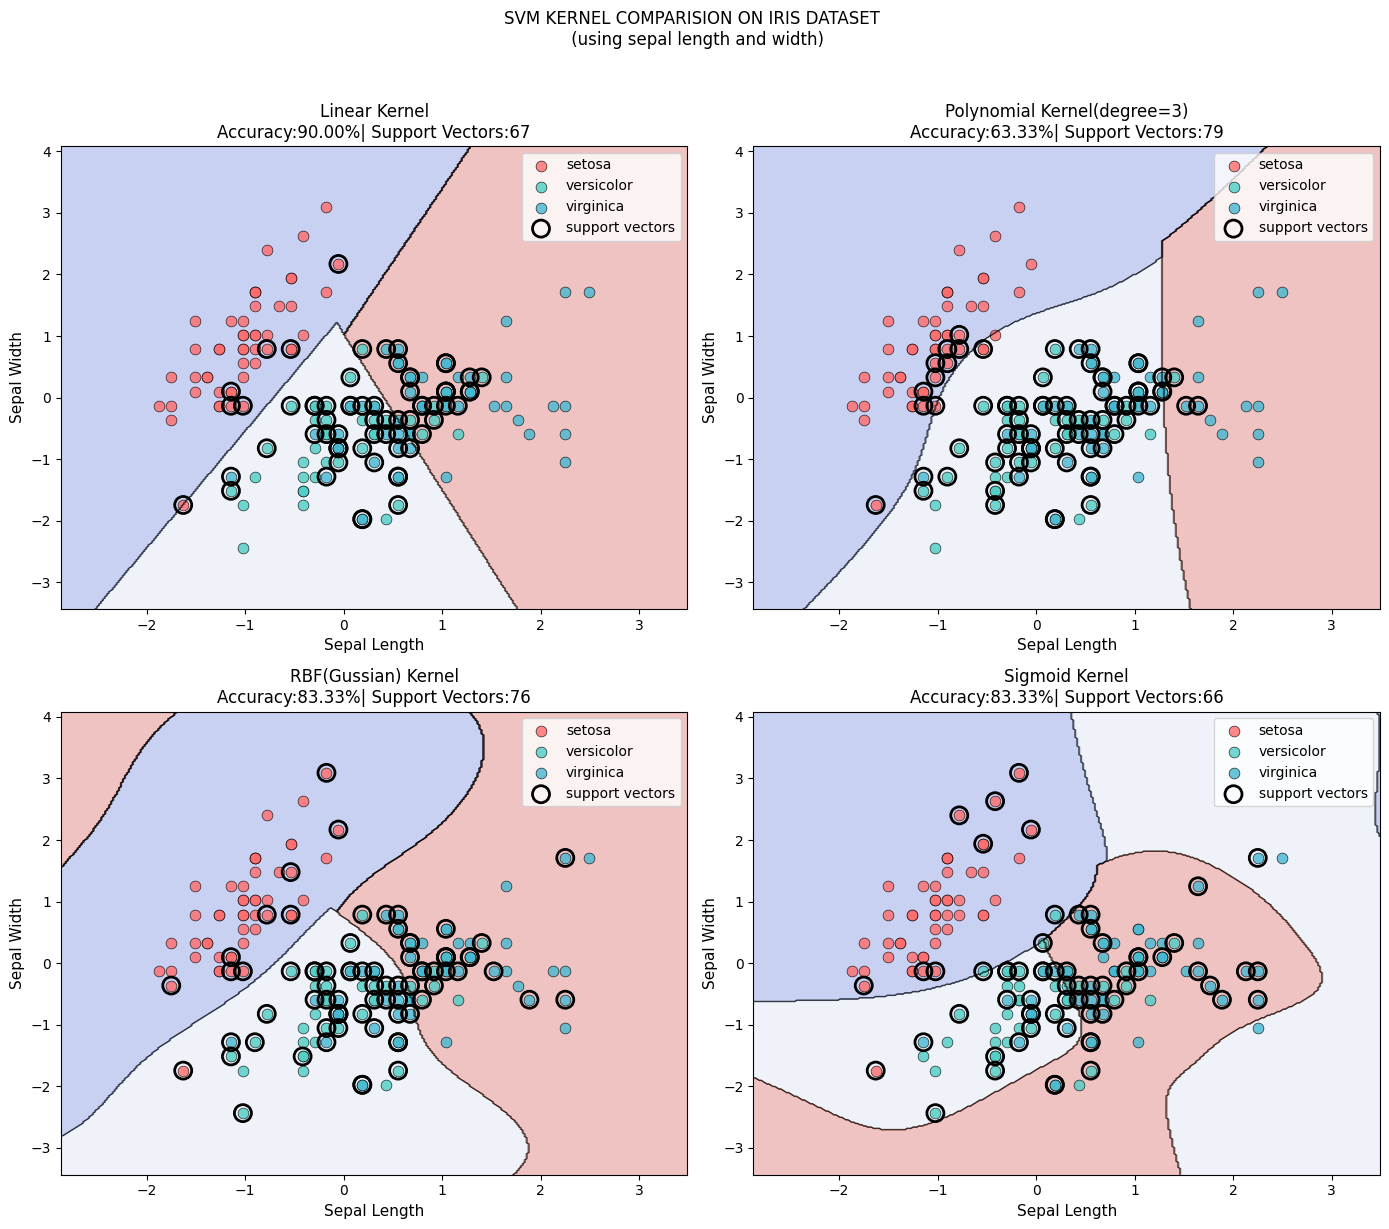

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

x_min, x_max = x_scaled[:, 0].min() - 1, x_scaled[:, 0].max() + 1
y_min, y_max = x_scaled[:, 1].min() - 1, x_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)
colors=['#FF6B6B','#4ECDC4','#45B7D1']
class_names=iris.target_names
accuracies=[]
for idx,(kernel,title) in enumerate(zip(kernels,kernel_titles)):
    ax=axes[idx]
    if kernel=='poly':
      svm=SVC(kernel=kernel,degree=3,gamma='scale',C=1.0)
    elif kernel=='sigmoid':
      svm=SVC(kernel=kernel,gamma='scale',C=1.0, coef0=0)
    else:
      svm=SVC(kernel=kernel,gamma='auto',C=1.0)
    svm.fit(x_train,y_train)
    y_pred=svm.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    accuracies.append(acc)
    z=svm.predict(np.c_[xx.ravel(),yy.ravel()])
    z=z.reshape(xx.shape)
    ax.contourf(xx,yy,z,alpha=0.3,cmap=plt.cm.coolwarm)
    ax.contour(xx,yy,z,colors='k',linewidths=0.5,alpha=0.5)
    for i,(color,name) in enumerate(zip(colors,class_names)):
      mask=y==i
      ax.scatter(x_scaled[mask,0],x_scaled[mask,1],
               c=color, label=name,
               edgecolors='black', s=60, linewidth=0.5,alpha=0.8
               )
    ax.scatter(svm.support_vectors_[:,0],svm.support_vectors_[:,1],
           s=150,facecolors='none',edgecolors='black',linewidth=2,label='support vectors')
    ax.set_xlabel('Sepal Length',fontsize=11)
    ax.set_ylabel('Sepal Width',fontsize=11)
    ax.set_title(f'{title}\nAccuracy:{acc:.2%}| Support Vectors:{len(svm.support_vectors_)}')
    ax.legend(loc='upper right')
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
plt.suptitle("SVM KERNEL COMPARISION ON IRIS DATASET \n (using sepal length and width)",y=1.02,fontsize=12)
plt.tight_layout()
plt.show()

In [9]:
print("=" * 60)
print("SVM KERNEL COMPARISON - IRIS DATASET")
print("=" * 60)

print(f"\nDataset: {len(x)} samples, 3 classes")
print("Features used: Sepal Length, Sepal Width (standardized)")
print("Train/Test split: 70% / 30%")

print("\n" + "-" * 60)
print("RESULTS:")
print("-" * 60)

for kernel, title, acc in zip(kernels, kernel_titles, accuracies):
    print(f"{title:35} | Accuracy: {acc:.2%}")

SVM KERNEL COMPARISON - IRIS DATASET

Dataset: 150 samples, 3 classes
Features used: Sepal Length, Sepal Width (standardized)
Train/Test split: 70% / 30%

------------------------------------------------------------
RESULTS:
------------------------------------------------------------
Linear Kernel                       | Accuracy: 90.00%
Polynomial Kernel(degree=3)         | Accuracy: 63.33%
RBF(Gussian) Kernel                 | Accuracy: 83.33%
Sigmoid Kernel                      | Accuracy: 83.33%


In [10]:
x=iris.data[:,2:4]
y=iris.target

In [11]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-1.34022653e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.31544430e+00],
       [-1.39706395e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.31544430e+00],
       [-1.16971425e+00, -1.05217993e+00],
       [-1.34022653e+00, -1.18381211e+00],
       [-1.28338910e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.44707648e+00],
       [-1.28338910e+00, -1.31544430e+00],
       [-1.22655167e+00, -1.31544430e+00],
       [-1.34022653e+00, -1.44707648e+00],
       [-1.51073881e+00, -1.44707648e+00],
       [-1.45390138e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.05217993e+00],
       [-1.39706395e+00, -1.05217993e+00],
       [-1.34022653e+00, -1.18381211e+00],
       [-1.16971425e+00, -1.18381211e+00],
       [-1.28338910e+00, -1.18381211e+00],
       [-1.16971425e+00, -1.31544430e+00],
       [-1.28338910e+00, -1.05217993e+00],
       [-1.56757623e+00, -1.31544430e+00],
       [-1.

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

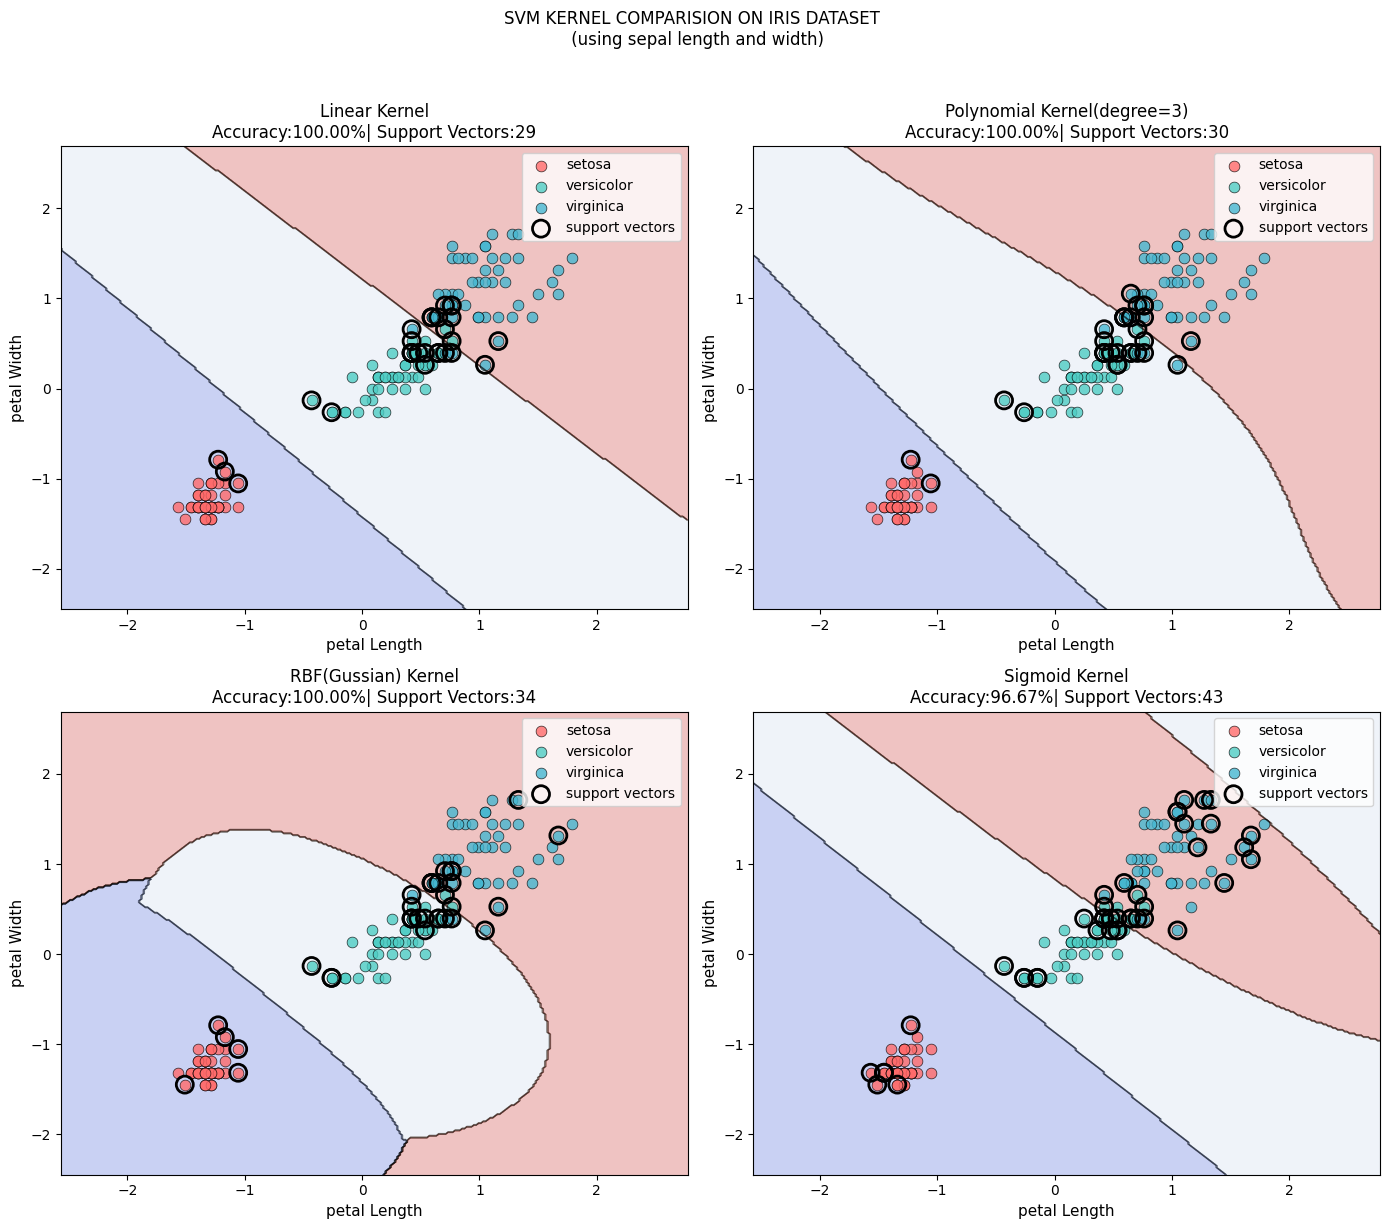

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()

x_min, x_max = x_scaled[:, 0].min() - 1, x_scaled[:, 0].max() + 1
y_min, y_max = x_scaled[:, 1].min() - 1, x_scaled[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.arange(x_min, x_max, 0.02),
    np.arange(y_min, y_max, 0.02)
)
colors=['#FF6B6B','#4ECDC4','#45B7D1']
class_names=iris.target_names
accuracies=[]
for idx,(kernel,title) in enumerate(zip(kernels,kernel_titles)):
    ax=axes[idx]
    if kernel=='poly':
      svm=SVC(kernel=kernel,degree=3,gamma='scale',C=1.0)
    elif kernel=='sigmoid':
      svm=SVC(kernel=kernel,gamma='scale',C=1.0, coef0=0)
    else:
      svm=SVC(kernel=kernel,gamma='auto',C=1.0)
    svm.fit(x_train,y_train)
    y_pred=svm.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    accuracies.append(acc)
    z=svm.predict(np.c_[xx.ravel(),yy.ravel()])
    z=z.reshape(xx.shape)
    ax.contourf(xx,yy,z,alpha=0.3,cmap=plt.cm.coolwarm)
    ax.contour(xx,yy,z,colors='k',linewidths=0.5,alpha=0.5)
    for i,(color,name) in enumerate(zip(colors,class_names)):
      mask=y==i
      ax.scatter(x_scaled[mask,0],x_scaled[mask,1],
               c=color, label=name,
               edgecolors='black', s=60, linewidth=0.5,alpha=0.8
               )
    ax.scatter(svm.support_vectors_[:,0],svm.support_vectors_[:,1],
           s=150,facecolors='none',edgecolors='black',linewidth=2,label='support vectors')
    ax.set_xlabel('petal Length',fontsize=11)
    ax.set_ylabel('petal Width',fontsize=11)
    ax.set_title(f'{title}\nAccuracy:{acc:.2%}| Support Vectors:{len(svm.support_vectors_)}')
    ax.legend(loc='upper right')
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
plt.suptitle("SVM KERNEL COMPARISION ON IRIS DATASET \n (using sepal length and width)",y=1.02,fontsize=12)
plt.tight_layout()
plt.show()

In [14]:
print("=" * 60)
print("SVM KERNEL COMPARISON - IRIS DATASET")
print("=" * 60)

print(f"\nDataset: {len(x)} samples, 3 classes")
print("Features used: petal Length, petal Width (standardized)")
print("Train/Test split: 70% / 30%")

print("\n" + "-" * 60)
print("RESULTS:")
print("-" * 60)

for kernel, title, acc in zip(kernels, kernel_titles, accuracies):
    print(f"{title:35} | Accuracy: {acc:.2%}")

SVM KERNEL COMPARISON - IRIS DATASET

Dataset: 150 samples, 3 classes
Features used: petal Length, petal Width (standardized)
Train/Test split: 70% / 30%

------------------------------------------------------------
RESULTS:
------------------------------------------------------------
Linear Kernel                       | Accuracy: 100.00%
Polynomial Kernel(degree=3)         | Accuracy: 100.00%
RBF(Gussian) Kernel                 | Accuracy: 100.00%
Sigmoid Kernel                      | Accuracy: 96.67%
